In [26]:
from torchvision import datasets
import matplotlib.pyplot as plt
import torch
data_path = './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


<PIL.Image.Image image mode=RGB size=32x32 at 0x13F48F010> 7 horse


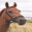

In [7]:
img, label = cifar10_val[99]
print(img, label, cifar10_val.classes[label])
img

In [8]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [15]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
print(imgs.view(3, -1).shape)
print(imgs.view(3, -1).mean(dim=1))
print(imgs.view(3, -1).std(dim=1))

torch.Size([3, 51200000])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [47]:
transfer = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transfer]))
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.Compose([transforms.ToTensor(), transfer]))
transformed_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))
           )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


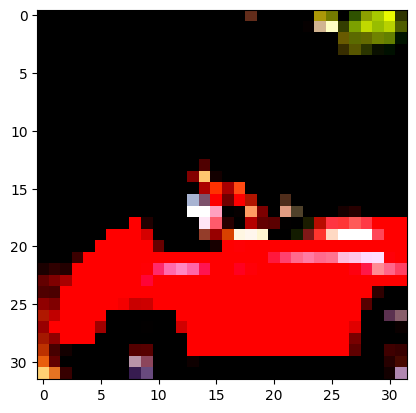

In [28]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [48]:
label_map = {0: 0, 2: 1}
class_names = {'airplane', 'bird'}
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [37]:
import torch.nn as nn

n_out = len(class_names)
vec_count = 32 * 32 * 3
hidden_count = 512

model = nn.Sequential(
    nn.Linear(
        vec_count,
        hidden_count
    ),
    nn.Tanh(),
    nn.Linear(
        hidden_count,
        n_out
    ),
    nn.Softmax(dim=1)
)

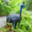

In [38]:
img, _ = cifar2[0]
img

In [39]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

AttributeError: view

In [58]:
model = nn.Sequential(
    nn.Linear(vec_count, hidden_count),
    nn.Tanh(),
    nn.Linear(hidden_count, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

Epoch: 0, Loss: 3.915517807006836
Epoch: 1, Loss: 2.0595297813415527
Epoch: 2, Loss: 9.950984954833984
Epoch: 3, Loss: 8.733173370361328
Epoch: 4, Loss: 13.124435424804688
Epoch: 5, Loss: 12.470376968383789
Epoch: 6, Loss: 13.294343948364258
Epoch: 7, Loss: 4.035276889801025
Epoch: 8, Loss: 2.8991100788116455
Epoch: 9, Loss: 7.084614276885986
Epoch: 10, Loss: 8.070074081420898
Epoch: 11, Loss: 8.646278381347656
Epoch: 12, Loss: 1.9212489128112793
Epoch: 13, Loss: 11.21290397644043
Epoch: 14, Loss: 12.783259391784668


KeyboardInterrupt: 

In [60]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(vec_count, hidden_count),
    nn.Tanh(),
    nn.Linear(hidden_count, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

Epoch: 0, Loss: 0.7809977531433105
Epoch: 1, Loss: 0.38566136360168457
Epoch: 2, Loss: 0.49020254611968994
Epoch: 3, Loss: 0.40833789110183716
Epoch: 4, Loss: 0.4792637825012207
Epoch: 5, Loss: 0.39816227555274963
Epoch: 6, Loss: 0.5163737535476685
Epoch: 7, Loss: 0.4068490266799927
Epoch: 8, Loss: 0.3702181279659271
Epoch: 9, Loss: 0.39248740673065186
Epoch: 10, Loss: 0.36288660764694214
Epoch: 11, Loss: 0.48067477345466614
Epoch: 12, Loss: 0.3439428210258484
Epoch: 13, Loss: 0.24303680658340454
Epoch: 14, Loss: 0.2740929126739502
Epoch: 15, Loss: 0.22524937987327576
Epoch: 16, Loss: 0.49391138553619385
Epoch: 17, Loss: 0.2905483543872833
Epoch: 18, Loss: 0.29750144481658936
Epoch: 19, Loss: 0.149156853556633
Epoch: 20, Loss: 0.4262350797653198
Epoch: 21, Loss: 0.43521299958229065
Epoch: 22, Loss: 0.29865211248397827
Epoch: 23, Loss: 0.7447553277015686
Epoch: 24, Loss: 0.14023470878601074
Epoch: 25, Loss: 0.3415663242340088
Epoch: 26, Loss: 0.24608522653579712
Epoch: 27, Loss: 0.24311

In [66]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predict = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predict == labels).sum())
        
print(f'Accuracy: {correct / total}')

Accuracy: 0.812


In [67]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])